# Analysis of Hashing Functions

In [7]:
import hashlib

hash_functions = hashlib.algorithms_guaranteed

for function in hash_functions:
    try:
        h = hashlib.new(function)
        h.update(b'Hello World')
        print(f"{function}: {h.hexdigest()}")
    except Exception as e:
        pass


sha224: c4890faffdb0105d991a461e668e276685401b02eab1ef4372795047
sha1: 0a4d55a8d778e5022fab701977c5d840bbc486d0
md5: b10a8db164e0754105b7a99be72e3fe5
blake2b: 4386a08a265111c9896f56456e2cb61a64239115c4784cf438e36cc851221972da3fb0115f73cd02486254001f878ab1fd126aac69844ef1c1ca152379d0a9bd
sha3_224: 8e800079a0b311788bf29353f400eff969b650a3597c91efd9aa5b38
sha3_512: 3d58a719c6866b0214f96b0a67b37e51a91e233ce0be126a08f35fdf4c043c6126f40139bfbc338d44eb2a03de9f7bb8eff0ac260b3629811e389a5fbee8a894
sha512: 2c74fd17edafd80e8447b0d46741ee243b7eb74dd2149a0ab1b9246fb30382f27e853d8585719e0e67cbda0daa8f51671064615d645ae27acb15bfb1447f459b
blake2s: 7706af019148849e516f95ba630307a2018bb7bf03803eca5ed7ed2c3c013513
sha3_256: e167f68d6563d75bb25f3aa49c29ef612d41352dc00606de7cbd630bb2665f51
sha256: a591a6d40bf420404a011733cfb7b190d62c65bf0bcda32b57b277d9ad9f146e
sha3_384: a78ec2851e991638ce505d4a44efa606dd4056d3ab274ec6fdbac00cde16478263ef7213bad5a7db7044f58d637afdeb
sha384: 99514329186b2f6ae4a1329e7ee6c610

{'sha224', 'sha1', 'md5', 'blake2b', 'sha3_224', 'sha3_512', 'sha512', 'blake2s', 'sha3_256', 'sha256', 'sha3_384', 'shake_128', 'sha384', 'shake_256'}


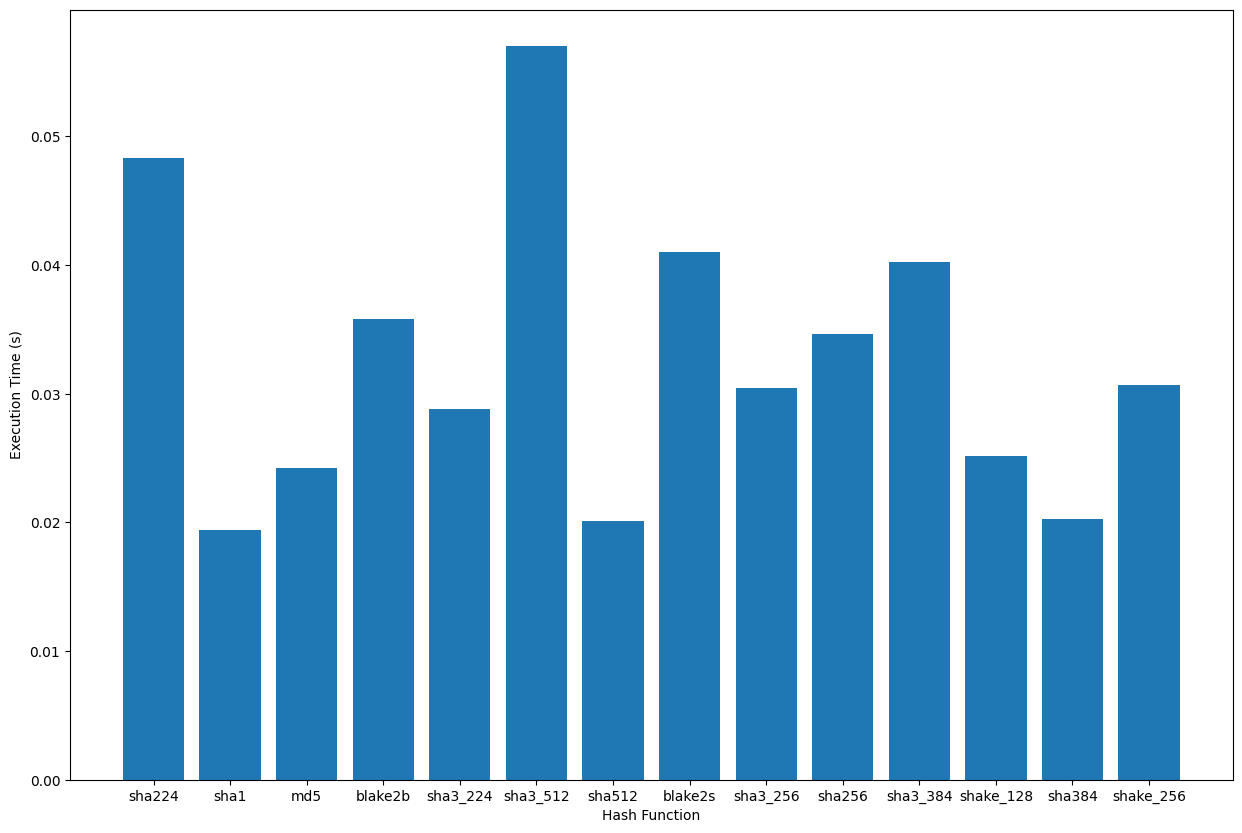

In [13]:
import hashlib
import timeit
import matplotlib.pyplot as plt

hash_functions = hashlib.algorithms_guaranteed
hash_times = {}

for function in hash_functions:
    h = hashlib.new(function)
    data = b'a' * (10**6) # 1MB data
    t = timeit.timeit(lambda: h.update(data), number=10)
    hash_times[function] = t
    
hash_names = [str(i) for i in hash_times.keys()]

plt.figure(figsize=(15,10)) # width, height in inches
plt.bar(hash_names, hash_times.values())
plt.xlabel('Hash Function')
plt.ylabel('Execution Time (s)')
plt.show()

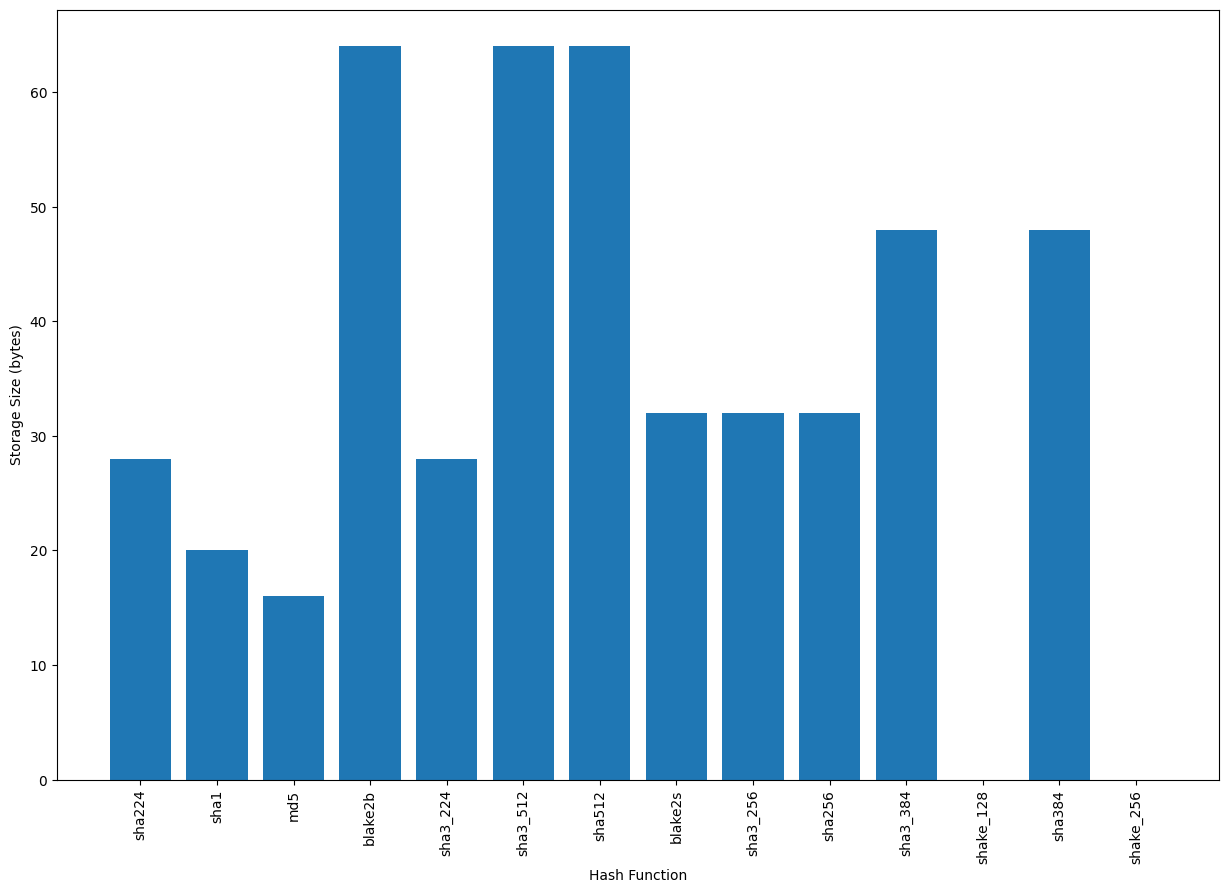

In [17]:
import hashlib
import matplotlib.pyplot as plt

hash_functions = hashlib.algorithms_guaranteed
hash_sizes = {}

for function in hash_functions:
    h = hashlib.new(function)
    data = b'a' * (10**6)
    h.update(data)
    digest = h.digest_size # will return the digest size in bytes
    hash_sizes[function] = digest

plt.figure(figsize=(15,10)) # width, height in inches
plt.bar(hash_sizes.keys(), hash_sizes.values())
plt.xlabel('Hash Function')
plt.ylabel('Storage Size (bytes)')
plt.xticks(rotation=90) # rotate the x-axis labels by 90 degrees
plt.show()


## Performance of other hashing functions

In [44]:
import time
import hashlib
import scrypt
import bcrypt
import argon2

# Test data
to_digest = b'Test data'

# Testing performance of SHA-256
start = time.time()
hash_operation = hashlib.sha256(to_digest).hexdigest()
end = time.time()
print('SHA-256 execution time:', end - start)

# Testing performance of Scrypt
start = time.time()
hash_operation = scrypt.hash(to_digest, salt=b'salt')
end = time.time()
print('Scrypt execution time:', end - start)

# Testing performance of Bcrypt
start = time.time()
hash_operation = bcrypt.hashpw(to_digest, bcrypt.gensalt())
end = time.time()
print('Bcrypt execution time:', end - start)

# Testing performance of Argon2
start = time.time()
hasher = argon2.PasswordHasher()
hash_operation = hasher.hash(to_digest)
end = time.time()
print('Argon2 execution time:', end - start)

SHA-256 execution time: 0.00016117095947265625
Scrypt execution time: 0.06273794174194336
Bcrypt execution time: 0.35397791862487793
Argon2 execution time: 0.04131293296813965


In [53]:
# Open the file
with open("G.arboreum_CRI-A2_v1.0_a1.0_cds.fasta", "r") as file:
    # Read the contents of the file
    file_contents = file.read()
    


with open("data.txt", 'w') as f:
    f.write(file_contents)

In [58]:
print(file_contents[:20000])

>evm.model.Ga01G0001 gene=EVM_prediction_Ga01G0001
ATGCTCTATAAGGAAAAGAAAGAGACGGAAAATGGGAGTCAAAAAATTCTGGTGGTAAAGACTAAGAGAG
TCTTAGTGGTTATAAGAAGGTGGGGAACTGAAAGAACATCAATGCTGAGGAAAACCTTAAAACTTGTTAT
GCAAGTATTGATAGGTATAGGCCATAAATCCATGAGATAA
>evm.model.Ga01G0002 gene=EVM_prediction_Ga01G0002
ATGACCGGGGATGCATGGAAGCAAGGAGGTATCGATGCCACTGGTGCGTTGATGGTCTTGACACTGAAAG
TCATTTCATGTGCAATGAACTACAATGATGGATTGTTGAAAGAGGAAGACTTACGTGAGGCTCGGAAAAA
AAATTGGTTAATTAAGCTACCCTCTTTGATTGAATACTTTGGGTACTGCCTGTGCTGTGGCAGTCACTTT
GCTGGTCCAGTTTACGAGATGAAGAACTACCTTGACTGGACTGAAGGGAAGGGGTTAAGATGCAACTTTG
GTGATCTTTCTTCTTATTCTTGCCCTCCTCCCCTTTTAAAGATTTGGGCTCATTCAGATAAAGGACCATC
ACCATCTCCATATGTAGCAACTCCACGAGCGCTTGTCCAAGCTGCTTTTTGTATGGCCATGTTTCTTTAC
CTTTCACCATCTCGTCCCTTGTCCTGGTTTACTGATCCTGCATACCAAGAATGGGGATTCTGGAGGAAGT
TGAGTTACCAATATATGTCTGGTTTTACAATGCGGTGGAAATATTATTTCATCTGGTCAATTTCAGAGGC
TGCTATGGTTATTTCTGGCCTGGGTTTCAGTGGATGGACTGAATCTTCACCACCAAAACCAAAATGGGAT
CGAGCAAAGGTTGTTGATATCCTAGGGTTTGAGTTAGCAAAGAGTTCAGTGCTGTTACCACTTGTCTTGA
ACATA

###### An example of a FASTA file containing the sequence of a gene called "Cytochrome b" from the elephant (Elephas maximus maximus) in NCBI GenBank:

In [71]:
data = '''>gi|5524211|gb|AAD44166.1| cytochrome b [Elephas maximus maximus]
ATGGCAGTGATGGCGGCGGATGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC'''
print(data)

>gi|5524211|gb|AAD44166.1| cytochrome b [Elephas maximus maximus]
ATGGCAGTGATGGCGGCGGATGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC


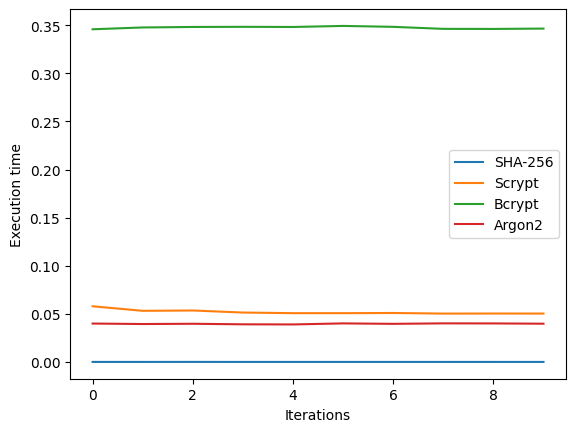

In [72]:
data = '''>gi|5524211|gb|AAD44166.1| cytochrome b [Elephas maximus maximus]
ATGGCAGTGATGGCGGCGGATGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC'''


import time
import hashlib
import scrypt
import bcrypt
import argon2
import matplotlib.pyplot as plt

# Test data
to_digest = data.encode()

# Lists to store execution times
sha256_times = []
scrypt_times = []
bcrypt_times = []
argon2_times = []

# Calculate execution time for each function
for i in range(10):
    start = time.time()
    hash_operation = hashlib.sha256(to_digest).hexdigest()
    end = time.time()
    sha256_times.append(end - start)

    start = time.time()
    hash_operation = scrypt.hash(to_digest, salt=b'salt')
    end = time.time()
    scrypt_times.append(end - start)

    start = time.time()
    hash_operation = bcrypt.hashpw(to_digest, bcrypt.gensalt())
    end = time.time()
    bcrypt_times.append(end - start)

    # Create hasher object
    hasher = argon2.PasswordHasher()
    start = time.time()
    hash_operation = hasher.hash(to_digest)
    end = time.time()
    argon2_times.append(end - start)

# Plot the performance graph
plt.plot(range(10), sha256_times, label='SHA-256')
plt.plot(range(10), scrypt_times, label='Scrypt')
plt.plot(range(10), bcrypt_times, label='Bcrypt')
plt.plot(range(10), argon2_times, label='Argon2')
plt.xlabel('Iterations')
plt.ylabel('Execution time')
plt.legend()
plt.show()


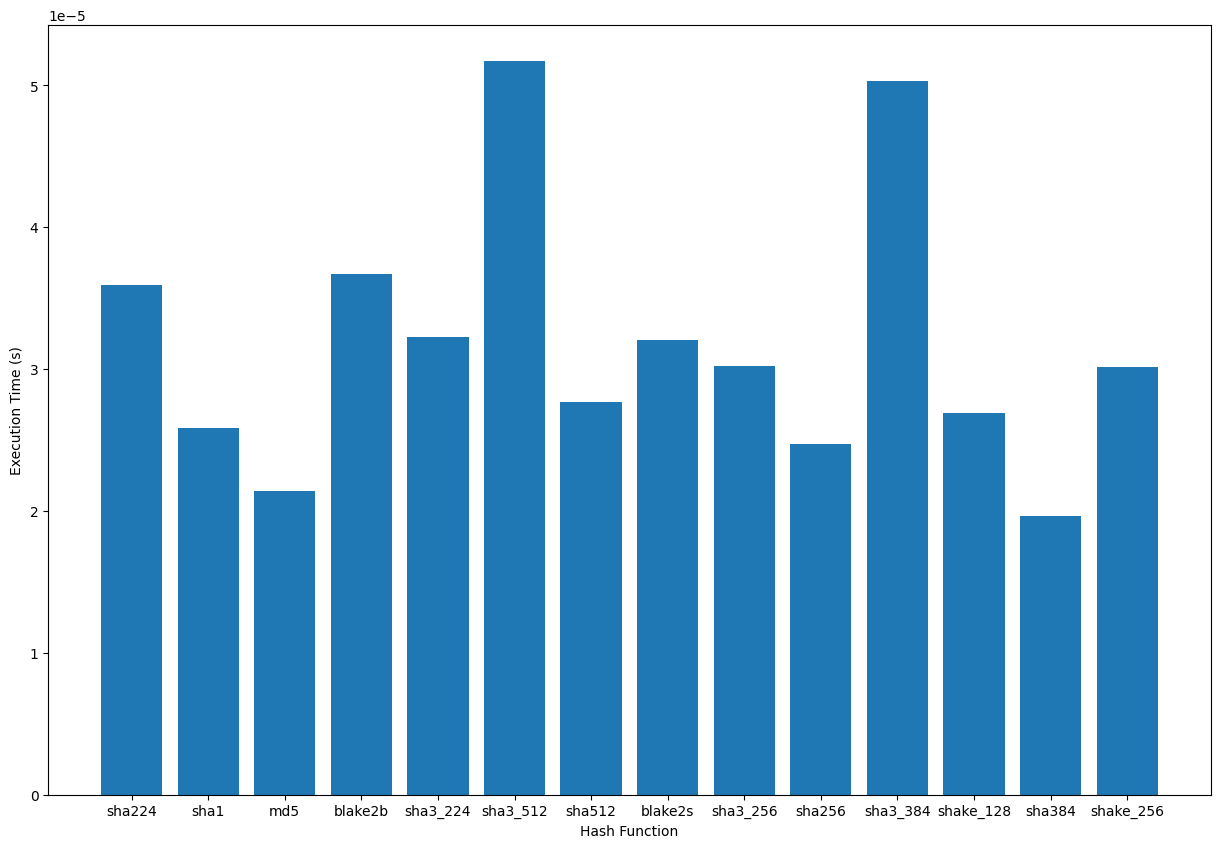

In [75]:
Mydata = '''>gi|5524211|gb|AAD44166.1| cytochrome b [Elephas maximus maximus]
ATGGCAGTGATGGCGGCGGATGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC
GGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGC'''


import hashlib
import timeit
import matplotlib.pyplot as plt

hash_functions = hashlib.algorithms_guaranteed
hash_times = {}

for function in hash_functions:
    h = hashlib.new(function)
    data = Mydata.encode() # 1MB data
    t = timeit.timeit(lambda: h.update(data), number=10)
    hash_times[function] = t
    
hash_names = [str(i) for i in hash_times.keys()]

plt.figure(figsize=(15,10)) # width, height in inches
plt.bar(hash_names, hash_times.values())
plt.xlabel('Hash Function')
plt.ylabel('Execution Time (s)')
plt.show()

# Math Function Analysis for Proof of Work

#### Some Random Function

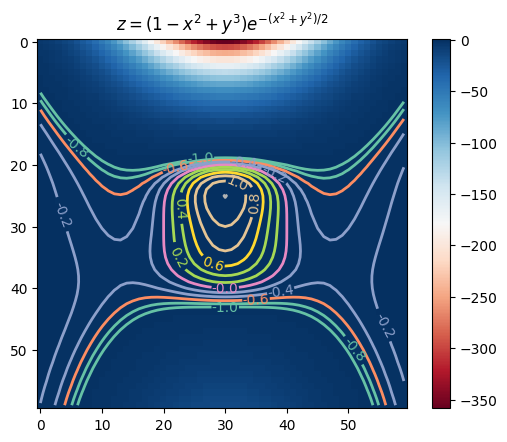

In [19]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(new_proof , previous_proof):
 return (1-(new_proof**2+previous_proof**4))*exp(-(new_proof**2+previous_proof)/2)
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

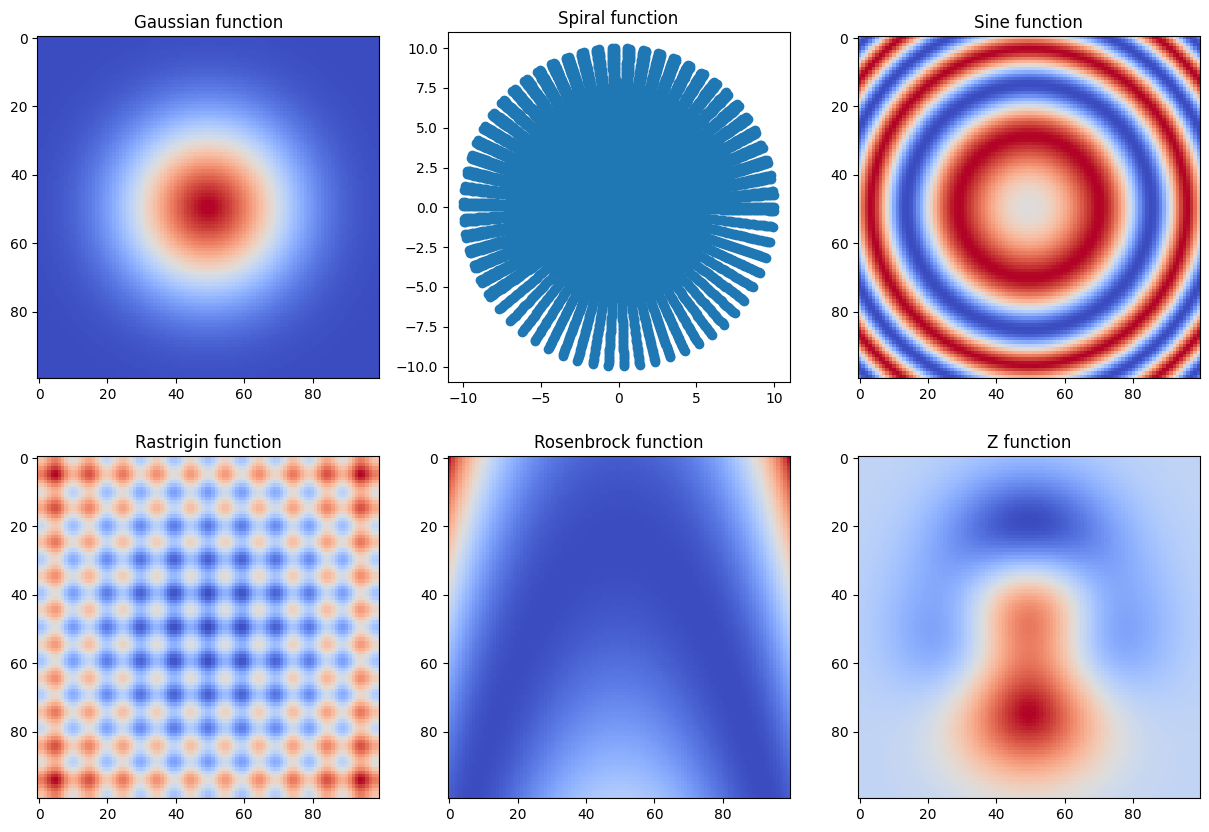

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian function
def gaussian_func(x, y, sigma=1):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Spiral function
def spiral_func(x, y):
    return (x * np.cos(y), x * np.sin(y))

# Sine function
def sine_func(x, y):
    return np.sin(x**2 + y**2)

# Rastrigin function
def rastrigin_func(x, y):
    return 20 + (x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y))

# Rosenbrock function
def rosenbrock_func(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Z function
def z_func(x, y):
    return (1 - x**2 + y**3) * np.exp(-(x**2 + y**2) / 2)

# Plotting Gaussian function
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = gaussian_func(X, Y)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0,0].imshow(Z, cmap='coolwarm')
axs[0,0].set_title('Gaussian function')

# Plotting Spiral function
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
X, Y = spiral_func(X, Y)
axs[0,1].scatter(X, Y, cmap='rainbow')
axs[0,1].set_title('Spiral function')

# Plotting Sine function
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = sine_func(X, Y)
axs[0,2].imshow(Z, cmap='coolwarm')
axs[0,2].set_title('Sine function')

# Plotting Rastrigin function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_func(X, Y)
axs[1,0].imshow(Z, cmap='coolwarm')
axs[1,0].set_title('Rastrigin function')

# Plotting Rosenbrock function
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)
axs[1,1].imshow(Z, cmap='coolwarm')
axs[1,1].set_title('Rosenbrock function')

# Plotting Z function
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = z_func(X, Y)
axs[1,2].imshow(Z, cmap='coolwarm')
axs[1,2].set_title('Z function')

plt.show()

### Performace Analysis of the Graphs

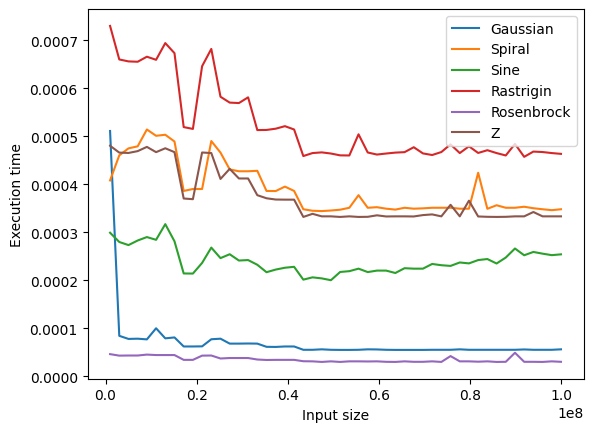

In [37]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Gaussian function
def gaussian_func(x, y, sigma=1):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Spiral function
def spiral_func(x, y):
    return (x * np.cos(y), x * np.sin(y))

# Sine function
def sine_func(x, y):
    return np.sin(x**2 + y**2)

# Rastrigin function
def rastrigin_func(x, y):
    return 20 + (x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y))

# Rosenbrock function
def rosenbrock_func(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Z function
def z_func(x, y):
    return (1 - x**2 + y**3) * np.exp(-(x**2 + y**2) / 2)

# Array of large values
large_values = np.linspace(10**6, 10**8, 50)

# Lists to store execution times
gaussian_times = []
spiral_times = []
sine_times = []
rastrigin_times = []
rosenbrock_times = []
z_times = []

# Calculate execution time for each function
for val in large_values:
    x = np.linspace(-val, val, 100)
    y = np.linspace(-val, val, 100)
    X, Y = np.meshgrid(x, y)

    start = time.time()
    Z = gaussian_func(X, Y)
    end = time.time()
    gaussian_times.append(end - start)

    start = time.time()
    X, Y = spiral_func(X, Y)
    end = time.time()
    spiral_times.append(end - start)

    start = time.time()
    Z = sine_func(X, Y)
    end = time.time()
    sine_times.append(end - start)

    start = time.time()
    Z = rastrigin_func(X, Y)
    end = time.time()
    rastrigin_times.append(end - start)

    start = time.time()
    Z = rosenbrock_func(X, Y)
    end = time.time()
    rosenbrock_times.append(end - start)

    start = time.time()
    Z = z_func(X, Y)
    end = time.time()
    z_times.append(end - start)

# Plot the performance graph
plt.plot(large_values, gaussian_times, label='Gaussian')
plt.plot(large_values, spiral_times, label='Spiral')
plt.plot(large_values, sine_times, label='Sine')
plt.plot(large_values, rastrigin_times, label='Rastrigin')
plt.plot(large_values, rosenbrock_times, label='Rosenbrock')
plt.plot(large_values, z_times, label='Z')
plt.xlabel('Input size')
plt.ylabel('Execution time')
plt.legend()
plt.show()
